#**EDA⭐**
- **EDA(Exploratory Data Analysis)**란 데이터를 탐색하고 분석하는 과정을 말한다. 이를 통해 데이터의 특징과 패턴을 파악하고 인사이트를 도출할 수 있다!

- 예를 들어, 학생들의 시험 성적 데이터가 있다고 가정해보자. EDA를 수행하면 다음과 같은 분석 과정을 거칠 수 있다.

> 1.   **데이터 불러오기**: 학생들의 시험 성적 데이터를 불러옴

> 2.   **데이터 확인**: 데이터를 살펴보며 누락된 값이나 이상치 등을 확인

> 3.   **기초 통계 분석**: 데이터의 기초 통계량(평균, 중앙값, 표준편차 등)을 계산하여 
데이터의 대략적인 특성 파악

> 4.   **시각화**: 데이터를 시각적으로 표현하여 데이터의 패턴이나 특징을 파악. 예를 들어, 히스토그램을 그려서 시험 성적의 분포를 확인하거나, 선 그래프를 그려서 시간에 따른 성적 변화를 파악 가능

> 5.   **상관 분석**: 데이터의 변수들 간의 상관관계를 파악. 예를 들어, 수학 점수와 과학 점수 간의 상관관계를 계산하여 두 변수 간의 연관성을 파악할 수 있음

> 6.   **인사이트 도출**: EDA를 통해 파악한 데이터의 특징과 패턴을 바탕으로 인사이트를 도출. 예를 들어, 시험 성적이 높은 학생들은 어떤 특징이 있는지, 어떤 학생들이 특정 과목에서 잘하지 못하는지 등을 파악할 수 있음

In [1]:
#구글 드라이브와 mount(연결)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#library load

import pandas as pd
import numpy as np

In [3]:
#Data load

train = pd.read_csv('/content/drive/MyDrive/2023_따릉이/자료/train.csv')
test = pd.read_csv('/content/drive/MyDrive/2023_따릉이/자료/test.csv')

**우리는 항상 데이터를 처음 살펴볼 때 3개의 함수를 사용해야하는 것을 기억하자!**




In [4]:
#데이터 상위 5개 확인
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [5]:
#데이터의 각종 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [6]:
#데이터 기술통계량 확인
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wind_direction,273.0,202.750967,56.659232,57.047,171.541,209.774,238.412,321.622
sky_condition,273.0,2.288256,0.961775,1.000,1.405,2.167,3.000,4.000
precipitation_form,273.0,0.100963,0.203193,0.000,0.000,0.000,0.088,1.000
wind_speed,273.0,2.480963,0.884397,0.753,1.820,2.411,2.924,5.607
humidity,273.0,56.745491,12.351268,24.831,47.196,55.845,66.419,88.885
low_temp,273.0,13.795249,5.107711,1.938,9.938,14.375,18.000,22.312
high_temp,273.0,23.384733,5.204605,9.895,19.842,24.158,27.526,33.421
Precipitation_Probability,273.0,16.878103,16.643772,0.000,4.054,12.162,22.973,82.162
number_of_rentals,273.0,59574.978022,27659.575774,1037.000,36761.000,63032.000,81515.000,110377.000


#**시각화(visualization)**
> ### **-시각화**를 진행하기 위해서는 아래 과정을 먼저 진행한 후에 시작해야 합니다.
1. **데이터 전처리**: 수집한 데이터가 깨끗하지 않은 경우, 데이터를 전처리해야 한다. 이 단계에서는 결측치, 이상치, 중복값 등을 처리하고, 데이터를 정제한다.

> 2. **데이터 탐색**: 전처리한 데이터를 탐색한다. 이 단계에서는 데이터의 분포, 상관관계, 이상치 등을 파악한다.

> 3. **데이터 시각화**: 정제된 데이터를 시각화한다. 비소로 데이터를 적절한 그래프나 차트로 표현하여 시각적으로 이해하기 쉽게 만든다.

---------------------------------------

- 시각화는 주로 프로젝트, 경진대회 발표 등 누군가에게 내가 만든, 발견한, 정제한 데이터를 보여주기 위해서 진행한다.

- 지금 진행하고 있는 따릉이 같은 공모전에서는 순위권을 위한 모델의 성능(=스코어)만 생각한다면 시각화를 진행하지 않아도 무방하다. 그렇지만, 내가 수상을 목표로 하고 더욱 높은 성적을 기대하고 있다면 시각화를 통한 발표는 **필수**이다!

- 어렵지만 알고 학년을 올라가는 것과 모르고 학년을 올라가는 것은 천지차이기 때문에 사용은 못해도 이해만 한다면 여러분은 아주 큰 이점을 가지고 공부하는 것입니다!

**시각화를 진행하기에 앞서 전처리를 먼저 진행한다.**

In [4]:
# apply 함수를 이용해서 연/월/일 이라는 새로운 컬럼을 생성
train['year'] = train['date_time'].apply(lambda x : x.split('-')[0]) #년
train['month'] = train['date_time'].apply(lambda x : x.split('-')[1]) #월
train['day'] = train['date_time'].apply(lambda x : x.split('-')[2]) #일

In [5]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,04,01
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,04,02
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,04,03
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,04,04
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,04,05


In [6]:
train.info()

#수치형 데이터지만 object타입의 데이터인 것을 확인
#object -> int형으로 바꿔줘야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    object 
 11  month                      273 non-null    object 
 12  day                        273 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 2

In [7]:
#요일 정보 추가하기
week_day = pd.to_datetime(train['date_time']).dt.day_name()
week_day

0         Sunday
1         Monday
2        Tuesday
3      Wednesday
4       Thursday
         ...    
268       Friday
269     Saturday
270       Sunday
271       Monday
272      Tuesday
Name: date_time, Length: 273, dtype: object

In [8]:
train['week_day'] = week_day

train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,04,01,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,04,02,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,04,03,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,04,04,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,04,05,Thursday


### 여기서 remind!!
- 대부분의 머신 러닝 알고리즘은 숫자형 데이터를 입력으로 받아들인다. 따라서 object 타입의 변수를 숫자형으로 변환해주어야 해당 변수를 머신 러닝 알고리즘에 적용할 수 있다.

- object 타입의 변수는 문자열로 이루어져 있으며, 이는 데이터 분석 과정에서 처리하기 어렵다. 예를 들어, 날짜 데이터가 object 타입으로 저장되어 있으면 날짜 간의 차이나 순서를 계산하는 등의 작업이 어렵다. 따라서 object 타입의 변수를 int 타입으로 변환하여 데이터 분석 과정을 수월하게 만드는 것이 좋다.

In [9]:
#object to int
train['year'] = train['year'].astype('int')
train['month'] = train['month'].astype('int')
train['day'] = train['day'].astype('int')

In [10]:
train[['year','month','day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    273 non-null    int64
 1   month   273 non-null    int64
 2   day     273 non-null    int64
dtypes: int64(3)
memory usage: 6.5 KB


In [11]:
#위에서 생성한 week_day 를 train 컬럼에 입력
train.week_day.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [12]:
train['week_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 273 entries, 0 to 272
Series name: week_day
Non-Null Count  Dtype 
--------------  ----- 
273 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


영어로 요일이 적혀있는것을 확인

요일도 마찬가지로 object형이므로 정수(int)형태로 변경
  - 일 -> 0
  - 월 -> 1
  - 화 -> 2
  - 수 -> 3
  - 목 -> 4
  - 금 -> 5
  - 토 -> 6

In [13]:
train.loc[train['week_day'] == 'Sunday', 'week_day'] = 0
train.loc[train['week_day'] == 'Monday', 'week_day'] = 1
train.loc[train['week_day'] == 'Tuesday', 'week_day'] = 2
train.loc[train['week_day'] == 'Wednesday', 'week_day'] = 3
train.loc[train['week_day'] == 'Thursday', 'week_day'] = 4
train.loc[train['week_day'] == 'Friday', 'week_day'] = 5
train.loc[train['week_day'] == 'Saturday', 'week_day'] = 6

In [14]:
train['week_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 273 entries, 0 to 272
Series name: week_day
Non-Null Count  Dtype 
--------------  ----- 
273 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


In [15]:
#object to int
train['week_day'] = train['week_day'].astype('int')

In [16]:
#unique함수를 이용한 고유값 확인
train['week_day'].unique()

array([0, 1, 2, 3, 4, 5, 6])

#**시각화 진행**
- 먼저, 저번 스터디 과제인 **가설 세우기**로 시각화를 진행해보겠습니다.
- 가설 3가지를 세워보고 가설에 대한 결과를 그래프로 살펴보도록 합시다.

1. 주중에 비해서 주말에 따릉이 대여량이 증가할 것이다.

2. 날씨가 덥고 습하다면 따릉이 대여량이 감소할 것이다.
1
3. 날씨가 춥고 바람이 많이 분다면 따릉이 대여량이 감소할 것이다.

In [21]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [22]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [23]:
!rm ~/.cache/matplotlib -rf

In [24]:
#시각화 패키지 불러오기

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.style.use('ggplot')

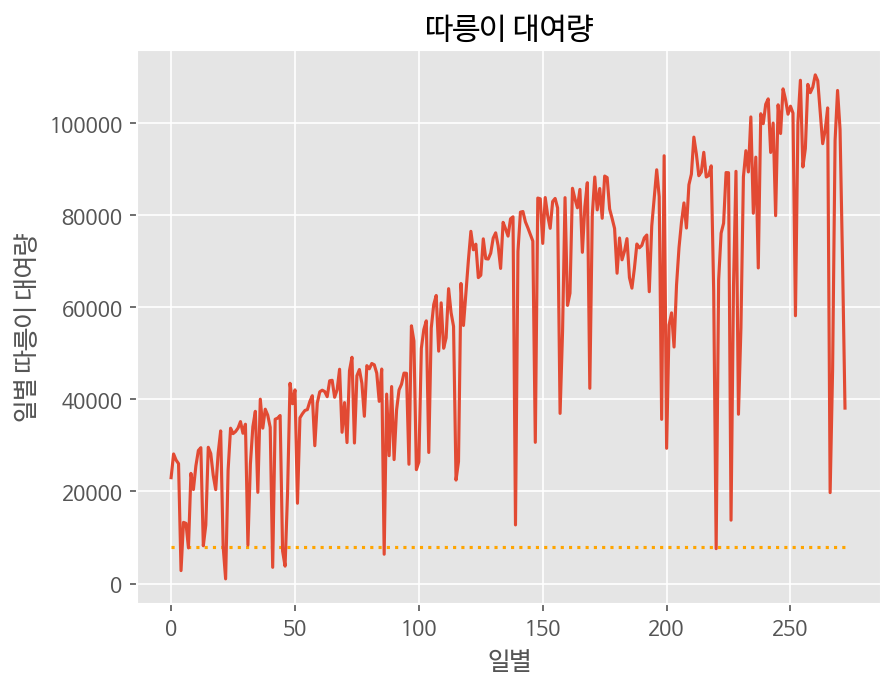

In [25]:
#Target 데이터인 따릉이 이용량 시각화

plt.figure(dpi = 150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title("따릉이 대여량")
plt.xlabel("일별")
plt.ylabel("일별 따릉이 대여량")
plt.hlines(y=8000, xmin=0, xmax=len(x), color='Orange', linestyle='dotted')
plt.plot(x,y)
plt.show()

##- 시각화를 통한 인사이트

1. 시간이 흐를수록 대여량이 증가하고 있다. -> 연도별 차이인것 으로 예상할 수 있음,

2. 평일에는 출근을 하니까 대여량이 주말보다 많을까? -> 요일별로 차이가 나타날 있음.

3. 이상치가 존재하는 것 같다.

### 연도별 따릉이 대여량

인사이트1 : 시간이 흐를수록 대여량이 증가하고 있다.

연도별 차이로 인해 시간이 흐를수록 대여량이 증가하고 있다고 예상할 수 있다.

연도별로 따릉이 대여량의 변화가 어떤지를 확인해보자.

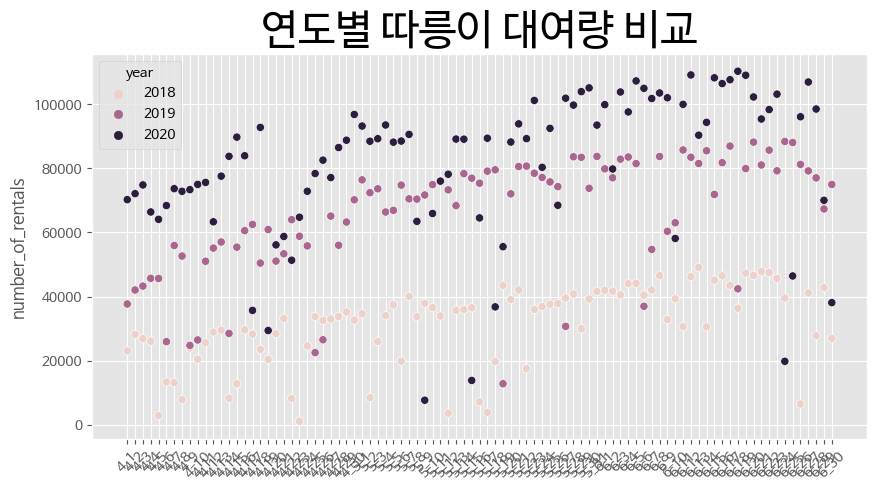

In [26]:
month_day = train['month'].astype(str) + '_' + train['day'].astype(str)

plt.figure(figsize=(10,5))
sns.scatterplot(x=month_day, y=train['number_of_rentals'], hue=train['year'])
plt.xticks(rotation=45)
plt.title('연도별 따릉이 대여량 비교', fontsize = 30)
plt.show()

그래프를 확인해 보니 2018 < 2019 < 2020 순서로 대여량이 증가하는 것을 확인

* 결론!

  Year은 매우 중요한 변수이고,

  Year을 이용해서 **파생 변수**를 생성해도 좋다.

### 가설1 : 평일과 주말 대여량

인사이트 2 : 평일에는 출근을 하니까 대여량이 주말보다 많을까?

평일에 출근하는 사람들이 따릉이를 타고 다니기 때문에 따릉이 대여량이 주말보다 평일이 많을 것으로 예상하고 있습니다.

주말과 평일의 따릉이 이용량을 비교해보도록 하겠습니다.

In [32]:
# 일요일, 토요일 -> 주말
weekend = train[(train['week_day'] == 0) | (train['week_day'] == 6)] 

# 일요일, 토요일 제외 -> 평일
weekday = train[(train['week_day'] != 0) & (train['week_day'] != 6)]

# 주말 따릉이 대여량의 평균
weekend.mean().number_of_rentals

# 평일 따릉이 대여량의 평균 
weekday.mean().number_of_rentals

<ipython-input-32-5e8c8ac34cf0>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekend.mean().number_of_rentals
<ipython-input-32-5e8c8ac34cf0>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekday.mean().number_of_rentals


59809.51282051282

<ipython-input-33-956c38995e85>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = [weekday.mean().number_of_rentals, weekend.mean().number_of_rentals]
<ipython-input-33-956c38995e85>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = [weekday.mean().number_of_rentals, weekend.mean().number_of_rentals]


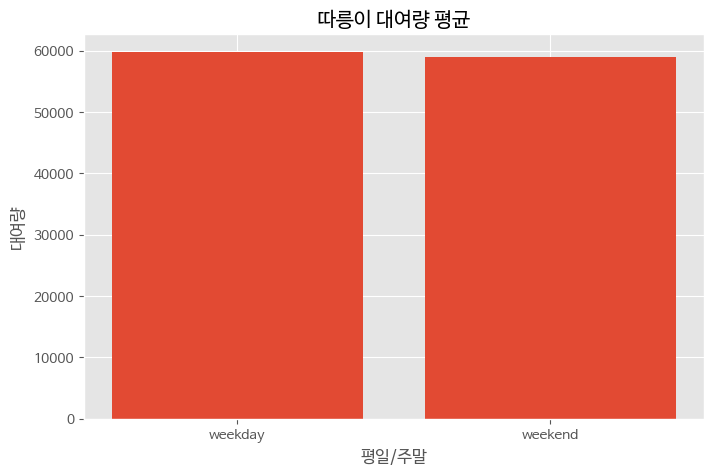

In [33]:
x = ['weekday', 'weekend']
y = [weekday.mean().number_of_rentals, weekend.mean().number_of_rentals]

plt.figure(figsize = (8,5))
plt.title("따릉이 대여량 평균")
plt.xlabel('평일/주말')
plt.ylabel('대여량')
plt.bar(x, y)
plt.show()

눈에 띄게 큰 차이는 보이지 않음 -> **인사이트 도출 불가!!**

<Axes: >

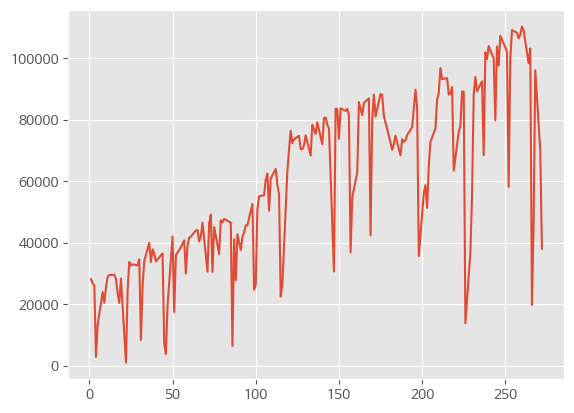

In [34]:
weekday.number_of_rentals.plot()

<Axes: >

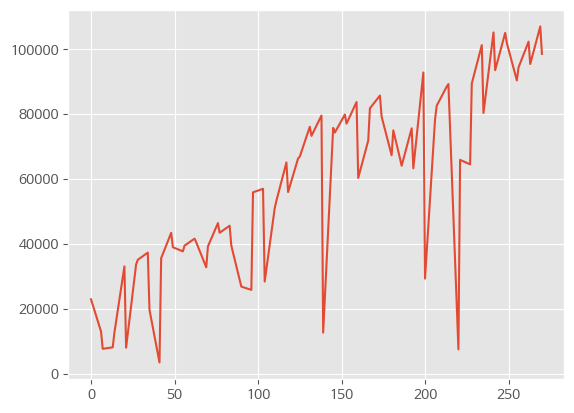

In [35]:
weekend.number_of_rentals.plot()

###가설1 결론 
- 평일과 주말은 별 차이가 없다고 말할 수 있다!

### 가설1 (파생) : 요일별 대여량
요일별로 따릉이 대여량의 차이가 있는지를 확인해보자.

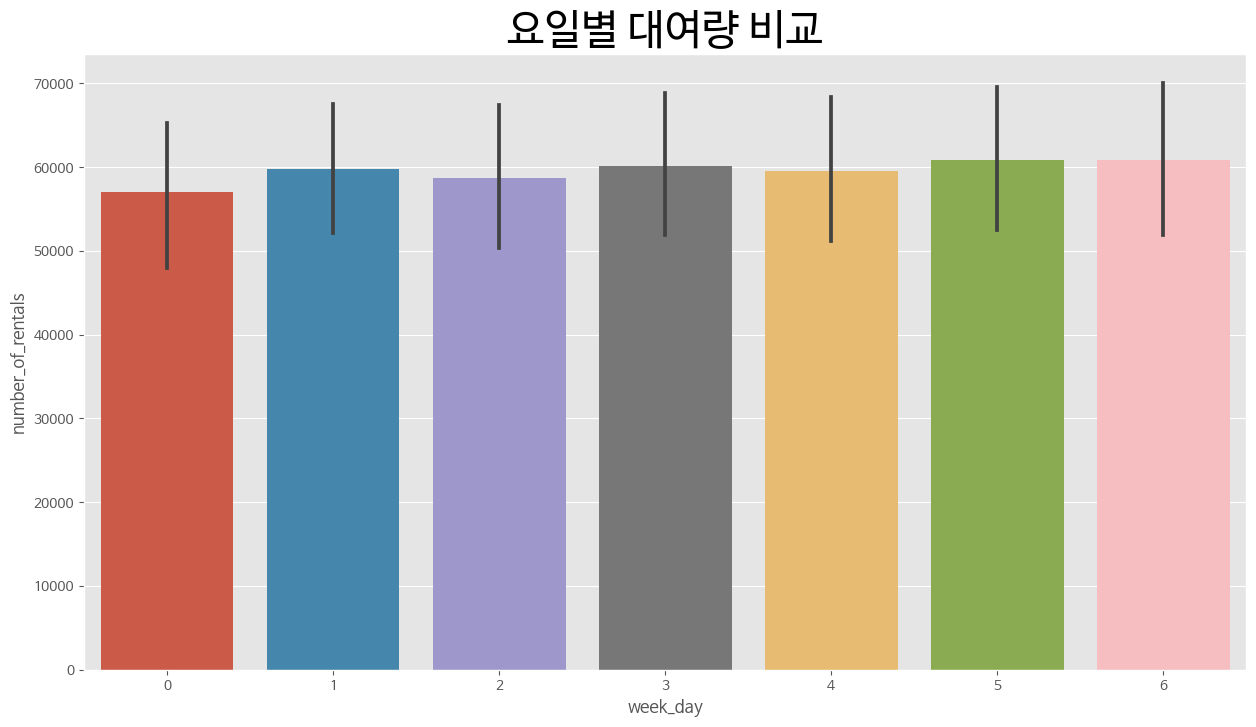

In [36]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'])
plt.title('요일별 대여량 비교', fontsize = 30)
plt.show()

이번엔 요일과 년도 별로 차이를 확인해 보겠습니다.

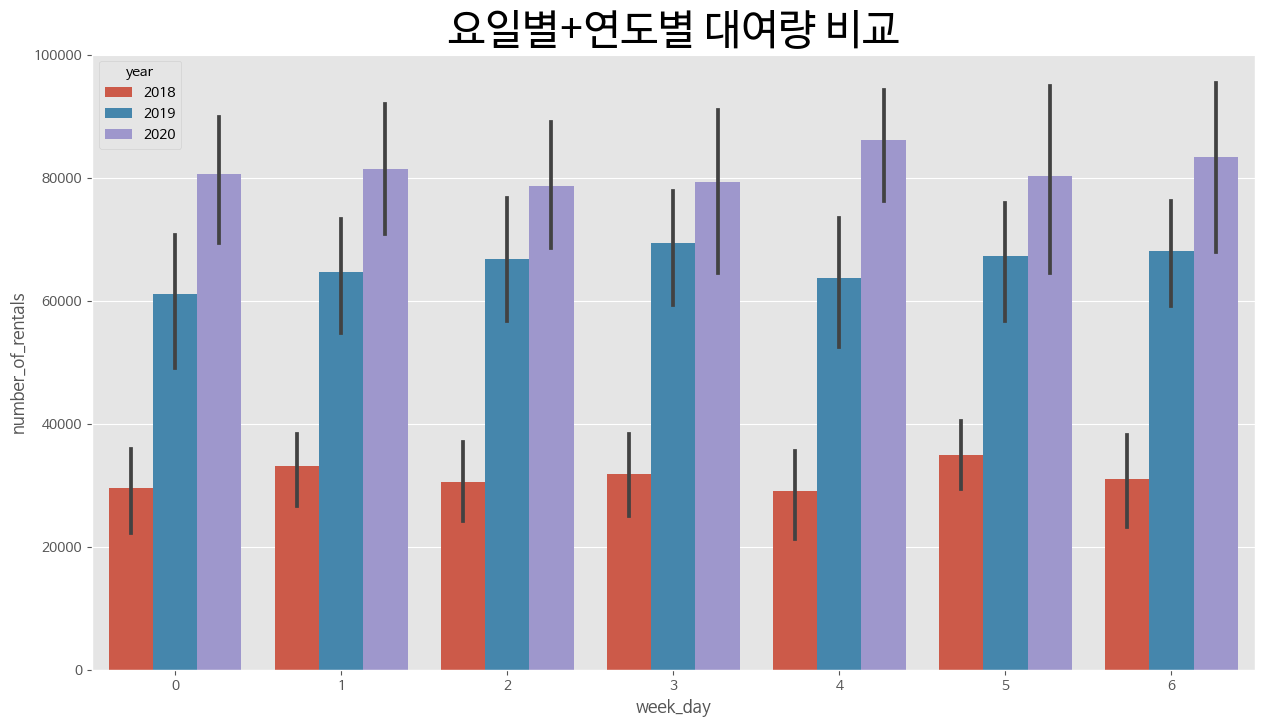

In [38]:
plt.figure(figsize=(15,8))

sns.barplot(x=train['week_day'], y=train['number_of_rentals'], hue=train['year'])
plt.title('요일별+연도별 대여량 비교', fontsize = 30)
plt.show()

###가설1(파생) 결론

- 큰 차이가 없는걸 보니 요일이라는 변수는 따릉이 대여량에 영향을 크게 미치지   않은 것 같음.

- 따라서 요일 칼럼은 drop을 해줘도 무방!